<a href="https://colab.research.google.com/github/U-Aravindhakumar/Crop-Production-Analysis-in-India/blob/main/Crop_Production_Analysis_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Production Analysis in India

## Load the library and Data

In [140]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [141]:

# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Crop Production data.csv")

In [142]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read the Data

In [143]:

# Data Exploration and Cleaning
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [144]:
# Get the dimensions of the dataframe
data.shape

(246091, 7)

In [145]:
# Get the row names of the dataframe
data.index

RangeIndex(start=0, stop=246091, step=1)

In [146]:
# Get the column names of the dataframe
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [147]:
# Look at basic information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


## Data Cleaning

In [148]:
print(data.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [149]:
data['Production'].fillna(data['Production'].mean(), inplace=True)

In [150]:
print(data.isnull().sum())
print(data.info())

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     246091 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


## Feature Engineering

In [151]:
le = LabelEncoder()
data['Season_Encoded'] = le.fit_transform(data['Season'])
data = pd.get_dummies(data, columns=['Season'], prefix='Season')
# Extracting year and month from 'Crop_Year'
data['Year'] = pd.to_datetime(data['Crop_Year'], format='%Y').dt.year
data['Month'] = pd.to_datetime(data['Crop_Year'], format='%Y').dt.month

# Creating a feature for the quarter of the year
data['Quarter'] = pd.to_datetime(data['Crop_Year'], format='%Y').dt.quarter


# Min-Max Scaling for 'Area'
scaler = MinMaxScaler()
data['Area_Scaled'] = scaler.fit_transform(data[['Area']])

# Standard Scaling for 'Production'
standard_scaler = StandardScaler()
data['Production_Standardized'] = standard_scaler.fit_transform(data[['Production']])
# Creating a new feature by combining 'Area' and 'Production'
data['Area_Per_Production'] = data['Area'] / data['Production']
# Imputing missing values with the mean for 'Area' column
data['Area'].fillna(data['Area'].mean(), inplace=True)


In [152]:
data['Production'] = data.groupby('District_Name')['Production'].transform(lambda x: x.fillna(x.mean()))
frames = [group for _, group in data.groupby('District_Name')]
final_df = pd.concat(frames, ignore_index=True)
final_df.isna().any()

State_Name                 False
District_Name              False
Crop_Year                  False
Crop                       False
Area                       False
Production                 False
Season_Encoded             False
Season_Autumn              False
Season_Kharif              False
Season_Rabi                False
Season_Summer              False
Season_Whole Year          False
Season_Winter              False
Year                       False
Month                      False
Quarter                    False
Area_Scaled                False
Production_Standardized    False
Area_Per_Production        False
dtype: bool

In [153]:
state_counts = final_df['State_Name'].value_counts()
print(state_counts)

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [155]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [156]:
zone_mapping = {
    'north_india': 'North Zone',
    'south_india': 'South Zone',
    'east_india': 'East Zone',
    'west_india': 'West Zone',
    'central_india': 'Central Zone',
    'north_east_india': 'NE Zone',
    'ut_india': 'Union Terr'
}
def get_zone_name(row):
    state_name = row['State_Name'].strip()
    for zone, label in zone_mapping.items():
        if state_name in globals()[zone]:
            return label
    return 'No Value'
final_df['Zones'] = final_df.apply(get_zone_name, axis=1)
unique_zones = final_df['Zones'].unique()
print(unique_zones)
zone_counts = final_df['Zones'].value_counts()
print(zone_counts)

['East Zone' 'South Zone' 'Central Zone' 'North Zone' 'West Zone'
 'NE Zone' 'Union Terr']
South Zone      54207
North Zone      51468
East Zone       43339
West Zone       33786
Central Zone    33652
NE Zone         28297
Union Terr       1342
Name: Zones, dtype: int64


In [158]:
production_stats = final_df['Production'].describe()
print(production_stats)

count    2.460910e+05
mean     5.825034e+05
std      1.693599e+07
min      0.000000e+00
25%      9.100000e+01
50%      7.880000e+02
75%      8.000000e+03
max      1.250800e+09
Name: Production, dtype: float64


In [171]:
def categorize_crop(crop):
    cereal_crops = ['Rice', 'Maize', 'Wheat', 'Barley', 'Varagu', 'Other Cereals & Millets', 'Ragi', 'Small millets', 'Bajra', 'Jowar', 'Paddy', 'Total foodgrain', 'Jobster']
    pulses_crops = ['Moong', 'Urad', 'Arhar/Tur', 'Peas & beans', 'Masoor', 'Other Kharif pulses', 'other misc. pulses', 'Ricebean (nagadal)', 'Rajmash Kholar', 'Lentil', 'Samai', 'Blackgram', 'Korra', 'Cowpea(Lobia)', 'Other Rabi pulses', 'Other Kharif pulses', 'Peas & beans (Pulses)', 'Pulses total', 'Gram']
    fruits_crops = ['Peach', 'Apple', 'Litchi', 'Pear', 'Plums', 'Ber', 'Sapota', 'Lemon', 'Pome Granet', 'Other Citrus Fruit', 'Water Melon', 'Jack Fruit', 'Grapes', 'Pineapple', 'Orange', 'Pome Fruit', 'Citrus Fruit', 'Other Fresh Fruits', 'Mango', 'Papaya', 'Coconut', 'Banana']
    beans_crops = ['Bean', 'Lab-Lab', 'Moth', 'Guar seed', 'Soyabean', 'Horse-gram']
    vegetables_crops = ['Turnip', 'Peas', 'Beet Root', 'Carrot', 'Yam', 'Ribed Guard', 'Ash Gourd', 'Pump Kin', 'Redish', 'Snak Guard', 'Bottle Gourd', 'Bitter Gourd', 'Cucumber', 'Drum Stick', 'Cauliflower', 'Beans & Mutter(Vegetable)', 'Cabbage', 'Bhindi', 'Tomato', 'Brinjal', 'Khesari', 'Sweet potato', 'Potato', 'Onion', 'Tapioca', 'Colocosia']
    spices_crops = ['Perilla', 'Ginger', 'Cardamom', 'Black pepper', 'Dry ginger', 'Garlic', 'Coriander', 'Turmeric', 'Dry chillies', 'Cond-spcs other']
    fibres_crops = ['other fibres', 'Kapas', 'Jute & mesta', 'Jute', 'Mesta', 'Cotton(lint)', 'Sannhamp']
    nuts_crops = ['Arcanut (Processed)', 'Atcanut (Raw)', 'Cashewnut Processed', 'Cashewnut Raw', 'Cashewnut', 'Arecanut', 'Groundnut']
    oilseeds_crops = ['other oilseeds', 'Safflower', 'Niger seed', 'Castor seed', 'Linseed', 'Sunflower', 'Rapeseed &Mustard', 'Sesamum', 'Oilseeds total']
    commercial_crops = ['Tobacco', 'Coffee', 'Tea', 'Sugarcane', 'Rubber']
    if crop in cereal_crops:
        return 'Cereal'
    elif crop in pulses_crops:
        return 'Pulses'
    elif crop in fruits_crops:
        return 'Fruits'
    elif crop in beans_crops:
        return 'Beans'
    elif crop in vegetables_crops:
        return 'Vegetables'
    elif crop in spices_crops:
        return 'Spices'
    elif crop in fibres_crops:
        return 'Fibres'
    elif crop in nuts_crops:
        return 'Nuts'
    elif crop in oilseeds_crops:
        return 'Oilseeds'
    elif crop in commercial_crops:
        return 'Commercial'
    else:
        return 'Other'
final_df['cat_crop'] = final_df['Crop'].apply(categorize_crop)
crop_category_counts = final_df['cat_crop'].value_counts()
print("Crop Category Counts:")
print(crop_category_counts)


Crop Category Counts:
Cereal        63800
Pulses        38509
Oilseeds      34454
Vegetables    23369
Spices        21986
Other         15876
Nuts          11588
Commercial    10716
Fibres        10195
Beans          9355
Fruits         6243
Name: cat_crop, dtype: int64


## Data Visualization

### Average Area by State in barplot

In [159]:
state_stats = data.groupby('State_Name')[['Area', 'Production']].mean().reset_index()

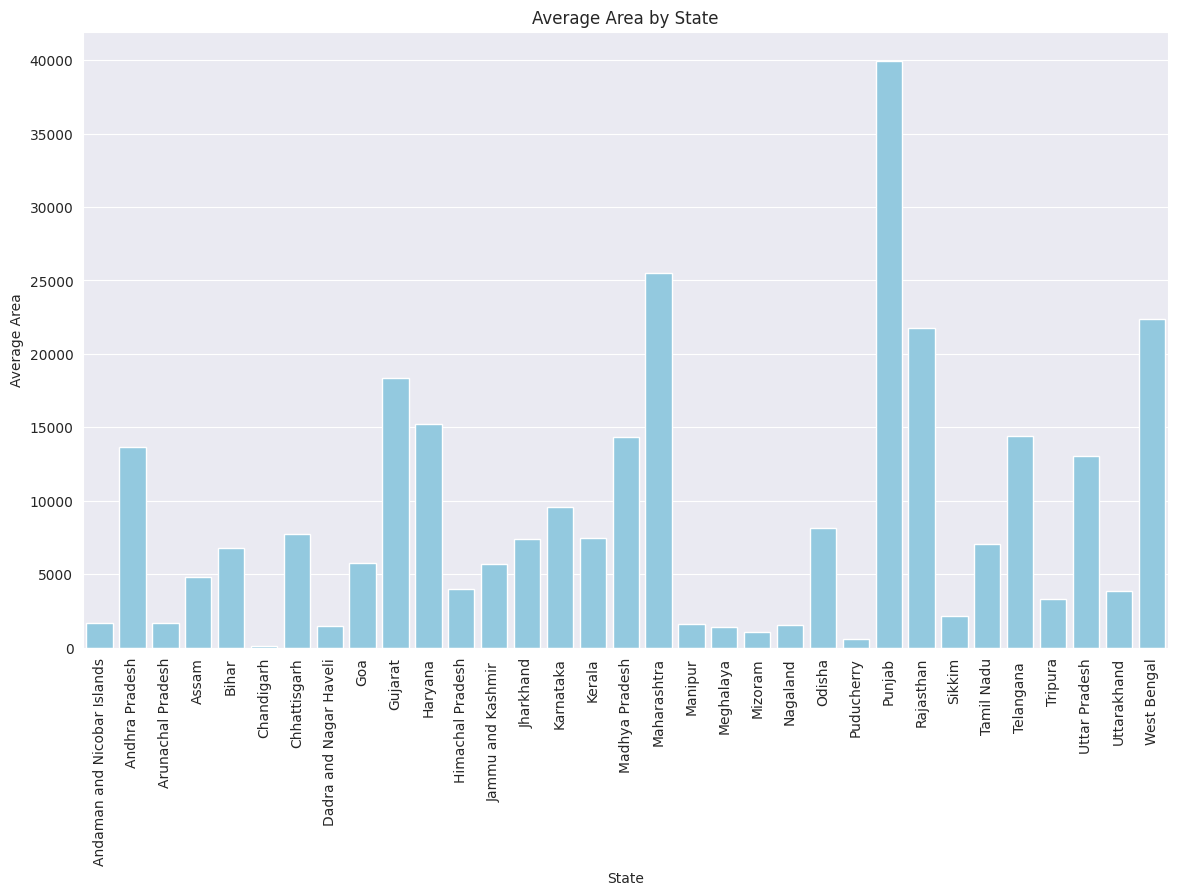

In [160]:
# Plotting Average Area
plt.figure(figsize=(14, 8))
sns.barplot(x='State_Name', y='Area', data=state_stats, color='skyblue')
plt.title('Average Area by State')
plt.xlabel('State')
plt.ylabel('Average Area')
plt.xticks(rotation=90)
plt.show()

### Average Production by State in barplot

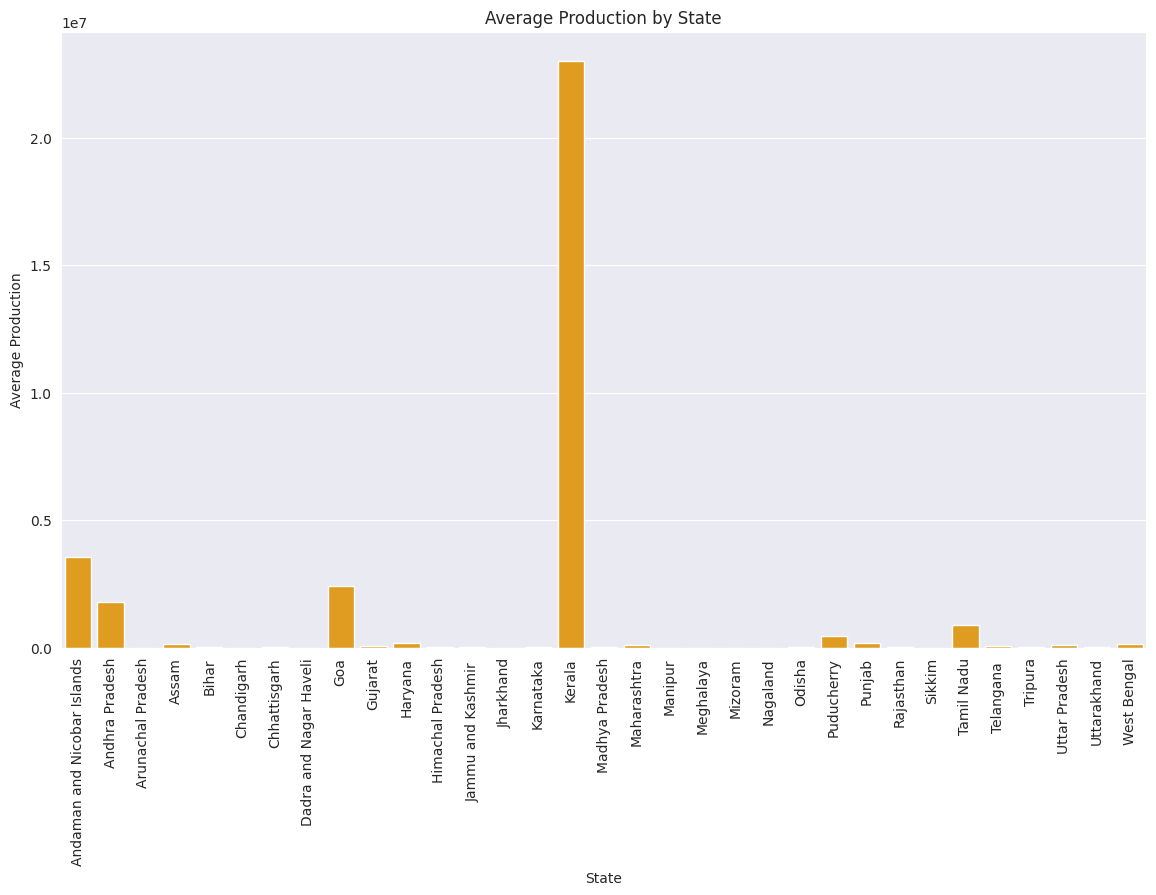

In [161]:
plt.figure(figsize=(14, 8))
sns.barplot(x='State_Name', y='Production', data=state_stats, color='orange')
plt.title('Average Production by State')
plt.xlabel('State')
plt.ylabel('Average Production')
plt.xticks(rotation=90)
plt.show()

### Production in boxplot

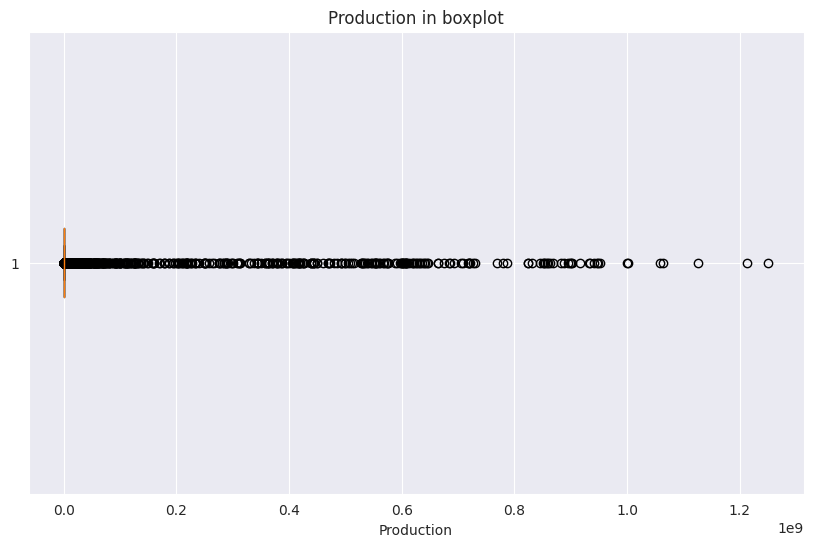

In [162]:
plt.figure(figsize=(10, 6))
plt.boxplot(final_df['Production'], vert=False)
plt.title('Production in boxplot')
plt.xlabel('Production')
plt.show()

### Area in boxplot

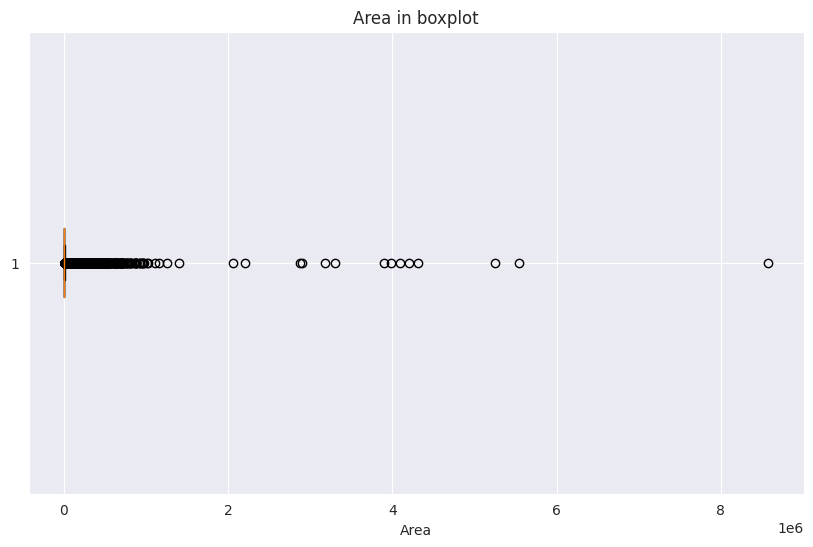

In [163]:
plt.figure(figsize=(10, 6))
plt.boxplot(final_df['Area'], vert=False)
plt.title('Area in boxplot')
plt.xlabel('Area')
plt.show()

### Correlation Matrix in heatmap

<ipython-input-164-c799c505f053>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


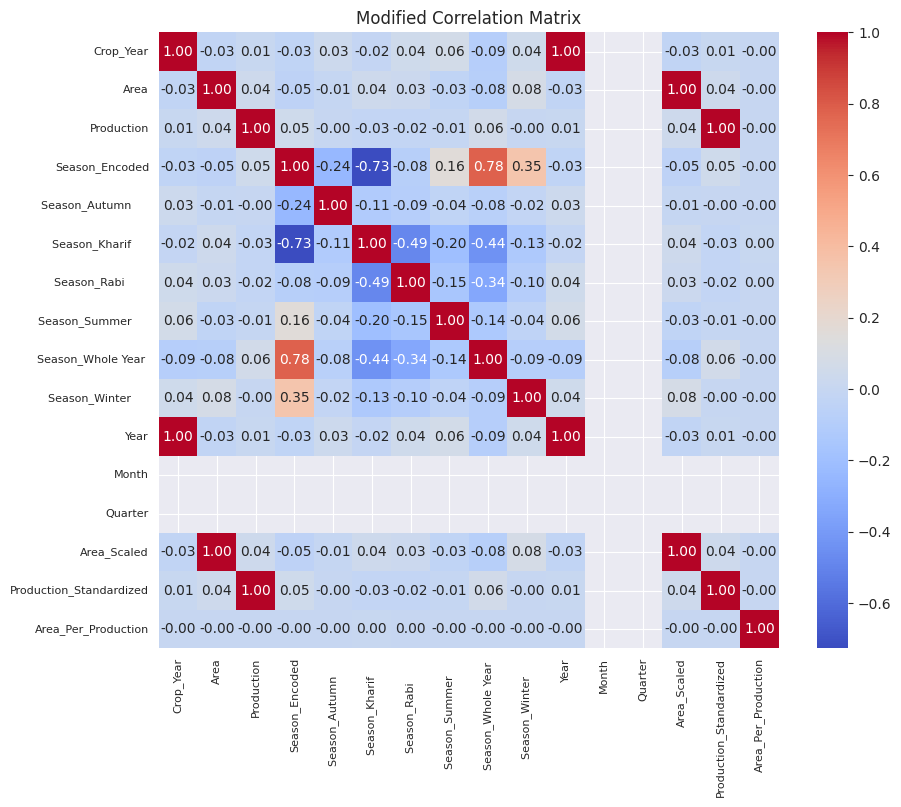

In [164]:
plt.figure(figsize=(10, 8))
plt.tick_params(axis='both', labelsize=8)
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Modified Correlation Matrix')
plt.show()

### Zone-wise totel productin in barplot

<ipython-input-166-42a621d568e0>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=final_df_sorted['Zones'], y=final_df_sorted['Production'], estimator=sum, ci=None, palette=colors)
<ipython-input-166-42a621d568e0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=final_df_sorted['Zones'], y=final_df_sorted['Production'], estimator=sum, ci=None, palette=colors)


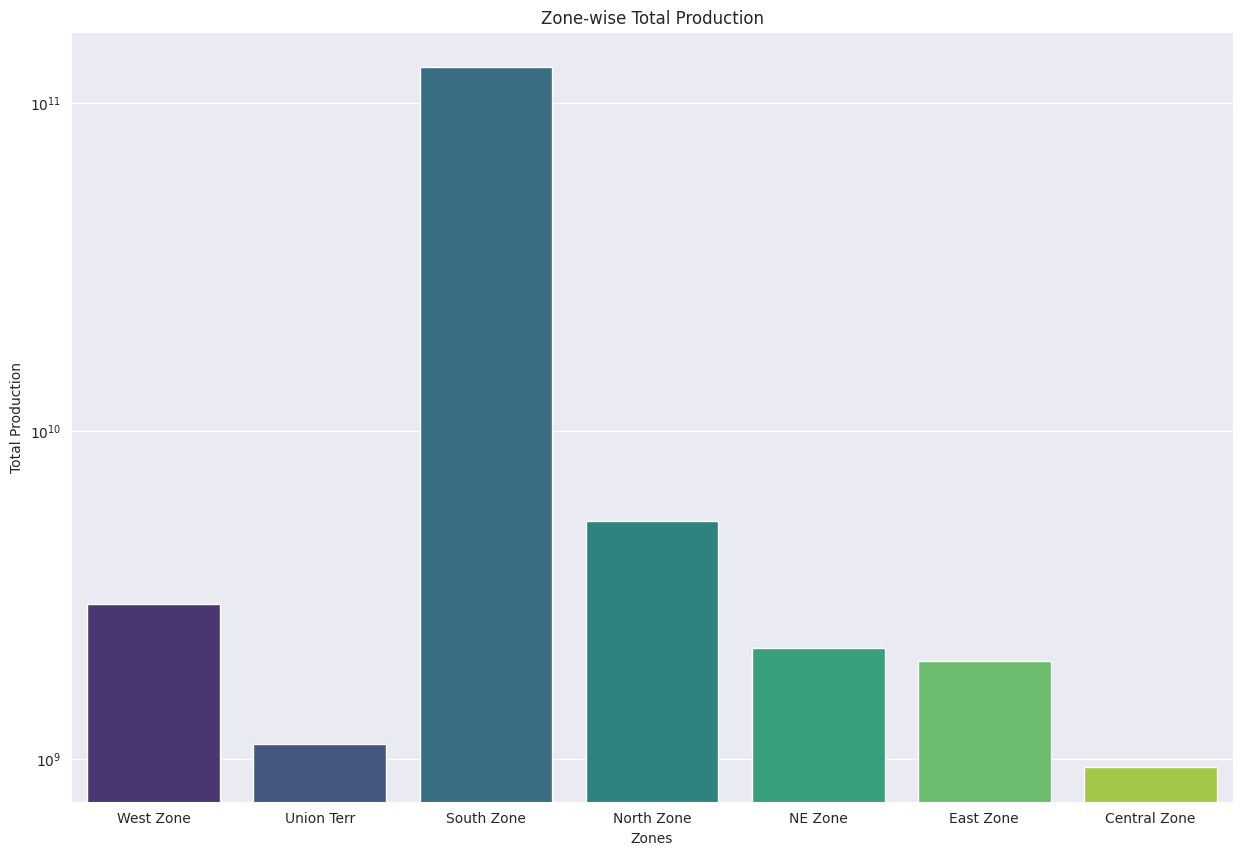

In [166]:
colors = sns.color_palette("viridis", n_colors=len(final_df['Zones'].unique()))
final_df_sorted = final_df.sort_values(by='Zones', ascending=False)
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=final_df_sorted['Zones'], y=final_df_sorted['Production'], estimator=sum, ci=None, palette=colors)
plt.yscale('log')
plt.title('Zone-wise Total Production')
plt.xlabel('Zones')
plt.ylabel('Total Production')
plt.show()

### Over all Crop Vs Production

<ipython-input-167-fce935f0adb9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crop['Crop'], y=crop['Production'], palette=colors)


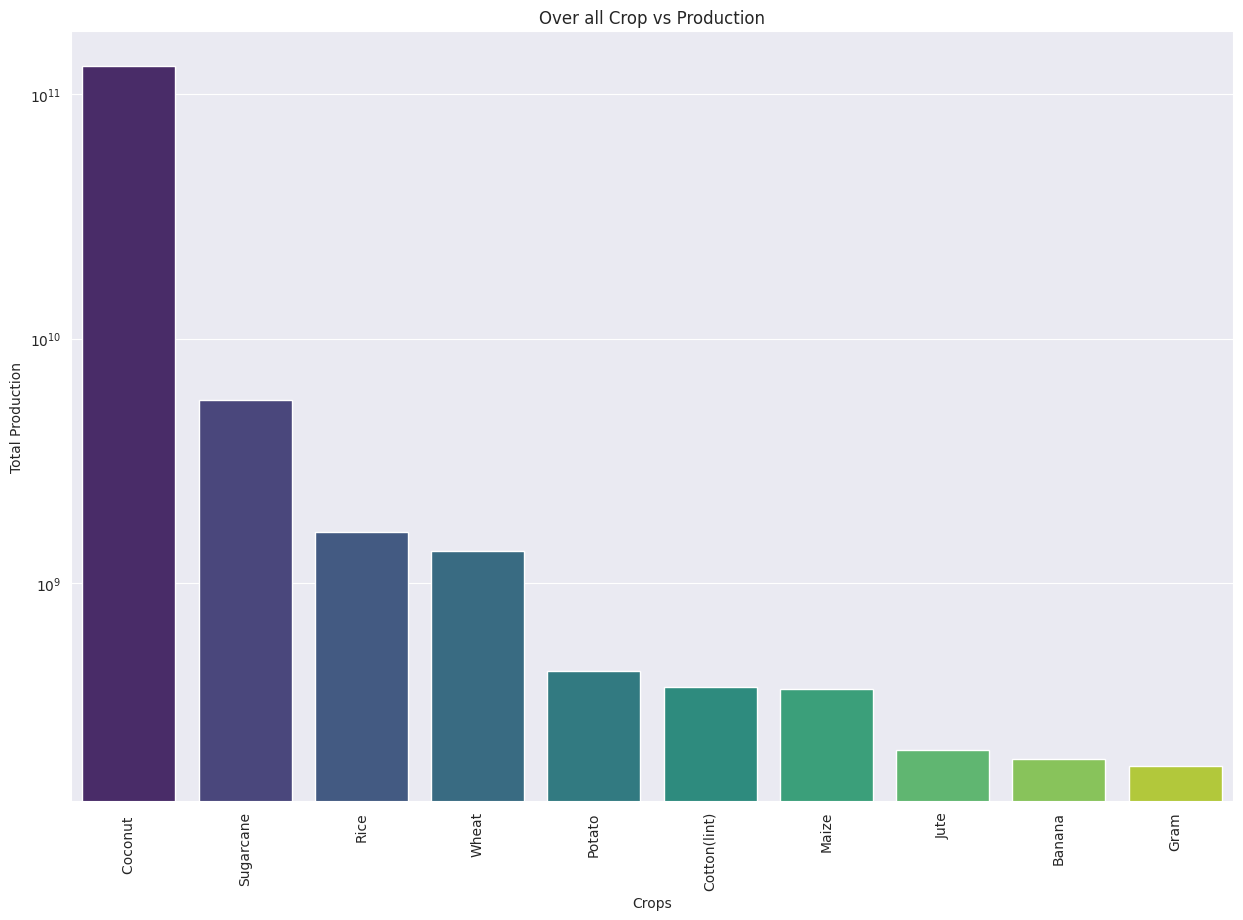

In [167]:
crop = final_df.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
colors = sns.color_palette("viridis", n_colors=len(crop))
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=crop['Crop'], y=crop['Production'], palette=colors)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Over all Crop vs Production')
plt.xlabel('Crops')
plt.ylabel('Total Production')
plt.show()

### Totel Production of Each Year in barplot

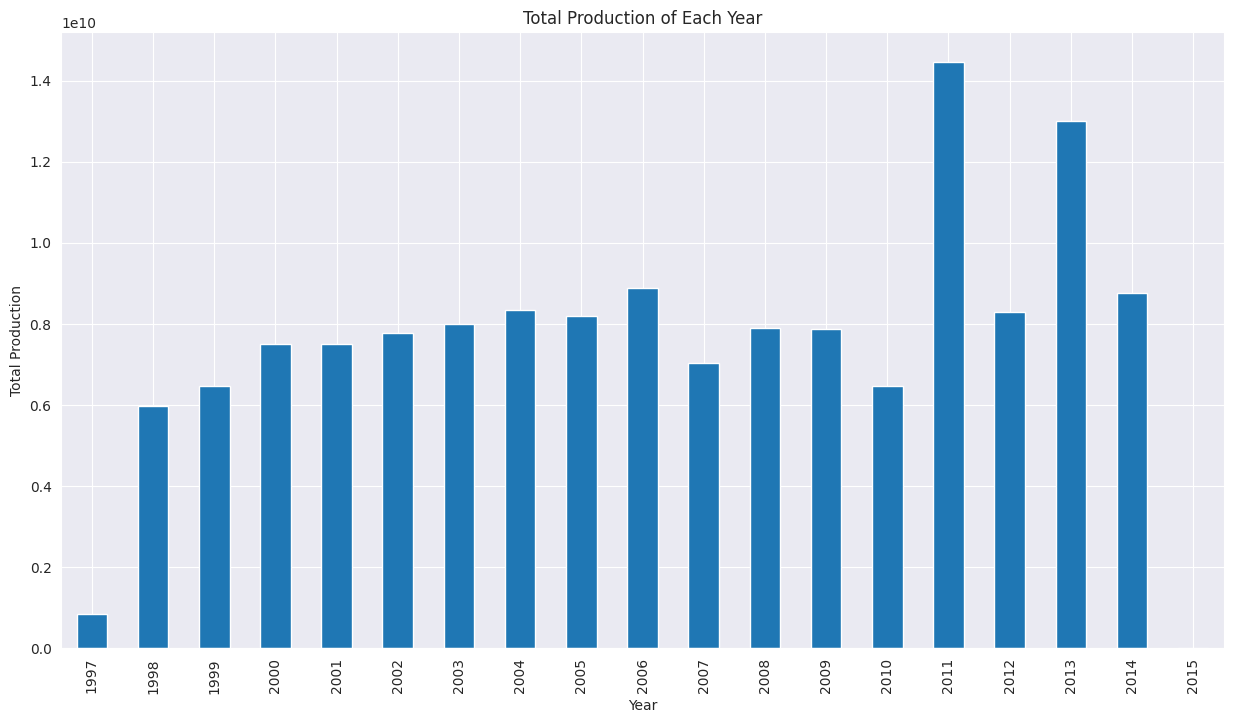

In [168]:
plt.figure(figsize=(15, 8))
final_df.groupby('Crop_Year')['Production'].agg('sum').plot.bar()
plt.tick_params(axis='both', labelsize=10)
plt.title('Total Production of Each Year')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.show()

### Production count of Crops in Each Category in barplot

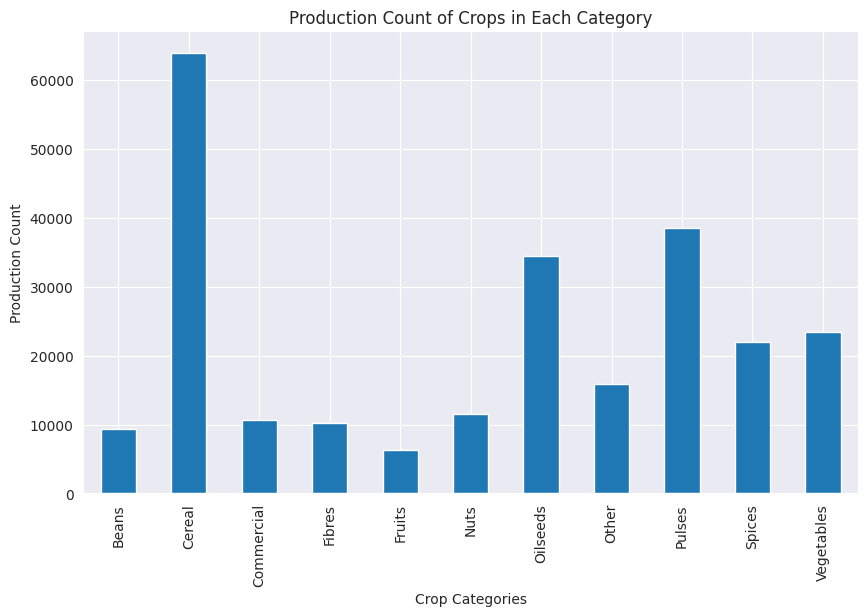

In [172]:
plt.figure(figsize=(10, 6))
final_df.groupby('cat_crop')['Production'].agg("count").plot.bar()
plt.tick_params(axis='both', labelsize=10)
plt.title('Production Count of Crops in Each Category')
plt.xlabel('Crop Categories')
plt.ylabel('Production Count')
plt.show()

### Distribution of Crops in Each Category in pieplot

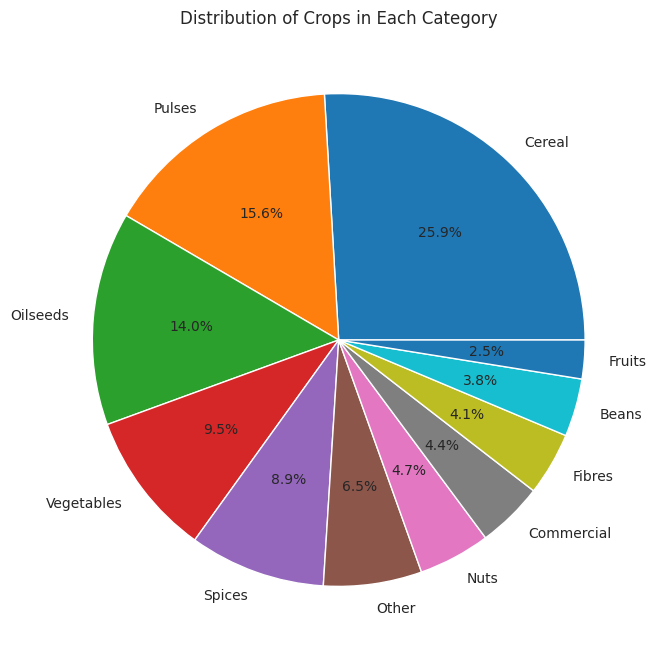

In [173]:
plt.figure(figsize=(8, 8))
cat_crop_count_df = final_df["cat_crop"].value_counts()
cat_crop_count_df.plot(kind="pie", autopct="%1.1f%%", pctdistance=0.6)
plt.title('Distribution of Crops in Each Category')
plt.ylabel('')
plt.tick_params(labelsize=10)
plt.show()

### Distribution of Crop Category Across State in barplot

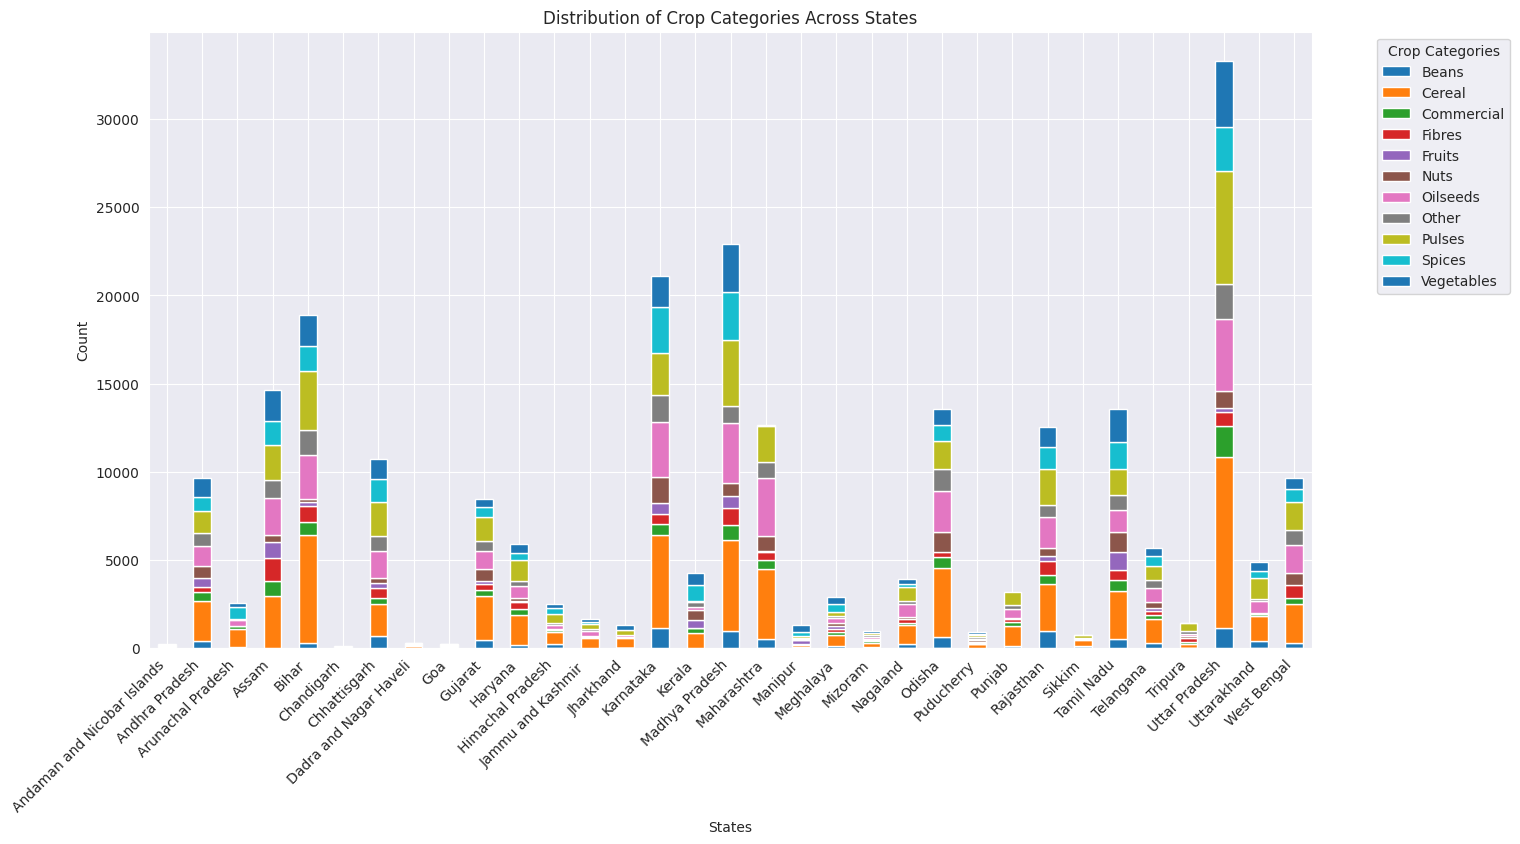

In [174]:
state_cat_crop = pd.crosstab(final_df['State_Name'], final_df['cat_crop'])
ax = state_cat_crop.plot(kind="bar", stacked=True, figsize=(15, 8))
plt.title('Distribution of Crop Categories Across States')
plt.xlabel('States')
plt.ylabel('Count')
plt.legend(title='Crop Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()

## Anaysing the Data

### **Most Frequently Grown Crops in India**

In [175]:
top_crops = final_df['Crop'].value_counts()[:5]
print(top_crops)

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
Name: Crop, dtype: int64


<ipython-input-176-7106edadcb7d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="State_Name", y="Production", data=rice_df, ci=None)


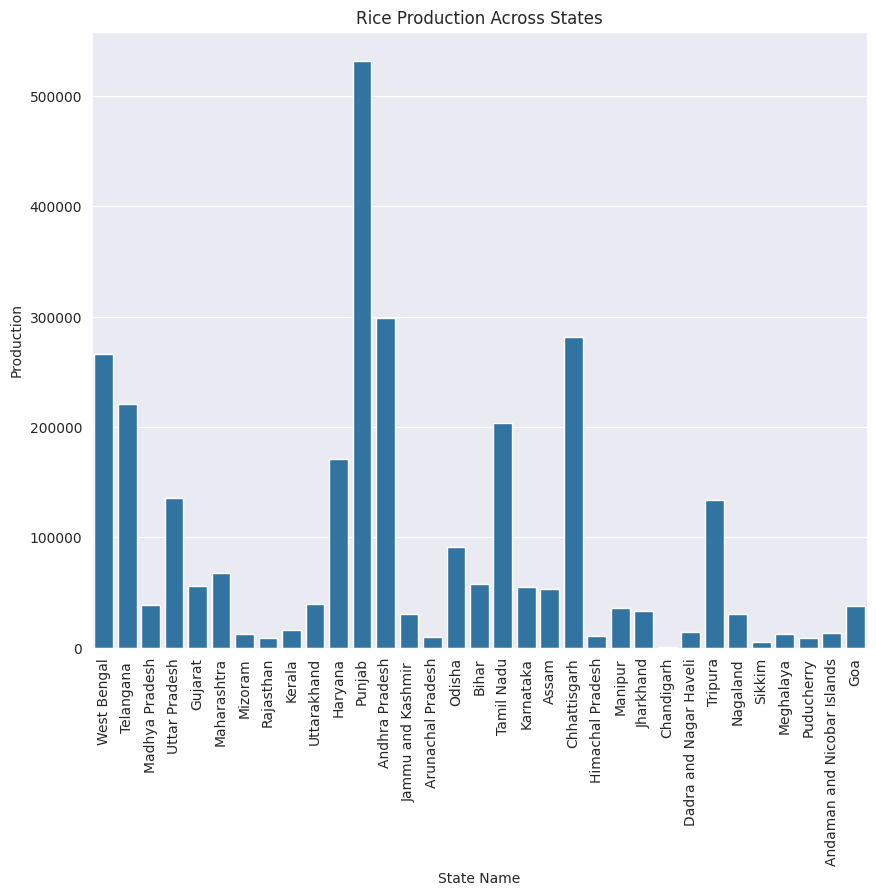

In [176]:
plt.figure(figsize=(10, 8))
sns.barplot(x="State_Name", y="Production", data=rice_df, ci=None)
plt.title('Rice Production Across States')
plt.xlabel('State Name')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.show()

In [177]:
top_rice_dist = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(by="Production", ascending=False)
print(top_rice_dist.head(5))

      District_Name  Production
58        BARDHAMAN  34239976.0
375  MEDINIPUR WEST  29192719.0
613   WEST GODAVARI  27845309.0
169   EAST GODAVARI  24690929.0
495         SANGRUR  24448000.0


<ipython-input-178-af024638a7c6>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Crop_Year", y="Production", data=rice_df, ci=None)


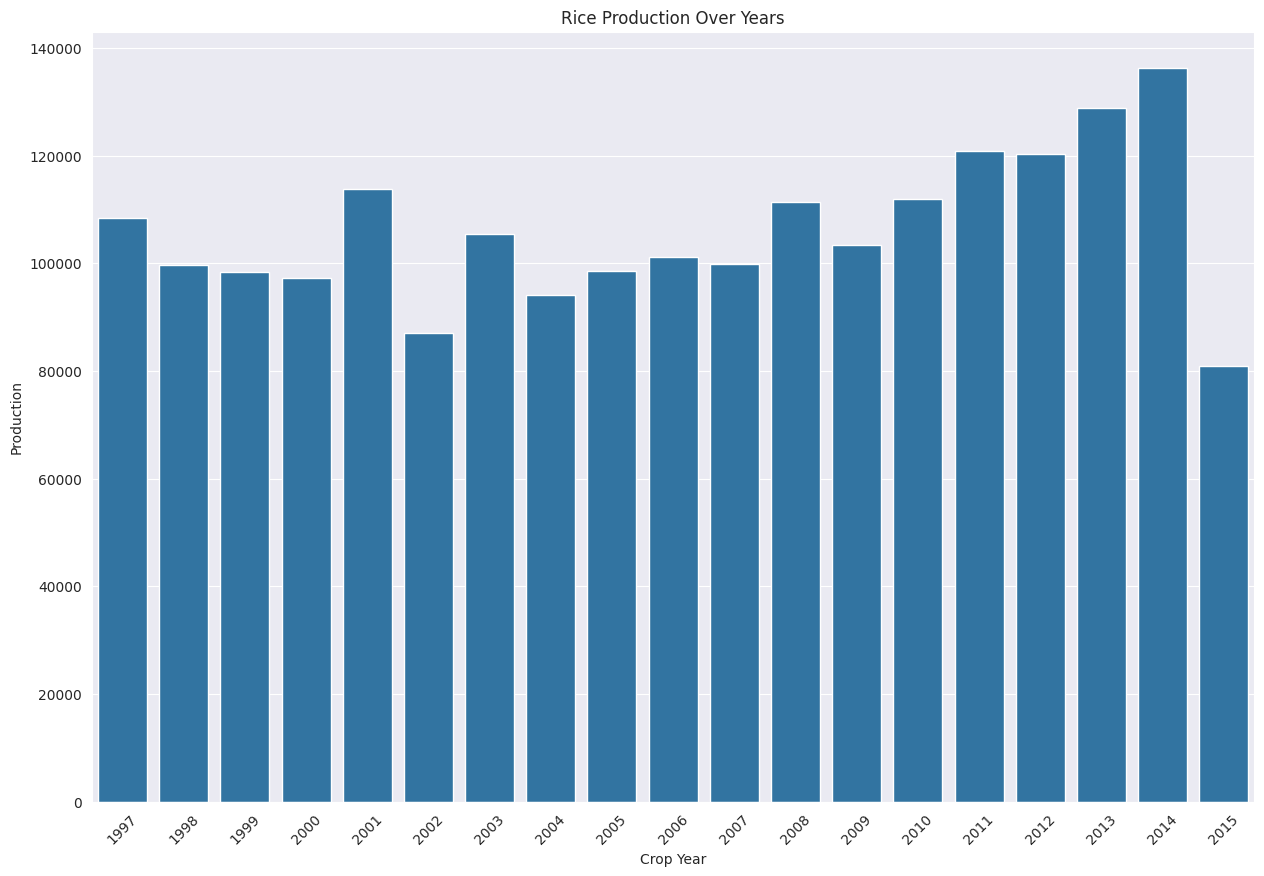

In [178]:
plt.figure(figsize=(15, 10))
sns.barplot(x="Crop_Year", y="Production", data=rice_df, ci=None)

plt.title('Rice Production Over Years')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.xticks(rotation=45)
plt.show()

**Observation :**


*   Rice is the most frequent crop in India.
*   Punjab is richest state for high rice production.
*   Bardaman district in Punjab is rich for rice production.
*   IN the year 2014 is rice production is too high.


---









### **Which state having huge amount of agricultural land**




In [179]:
df_area = final_df.groupby("State_Name")["Area"].sum().reset_index()
df_area = df_area.sort_values(by="Area", ascending=False)
top_states_area = df_area.head()
print("Top States by Total Cultivation Area:")
print(top_states_area)

Top States by Total Cultivation Area:
        State_Name          Area
30   Uttar Pradesh  4.336316e+08
16  Madhya Pradesh  3.298131e+08
17     Maharashtra  3.222062e+08
25       Rajasthan  2.720249e+08
32     West Bengal  2.154052e+08


<ipython-input-180-2d27cfec366b>:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.barplot(x=top_states_area['State_Name'], y=top_states_area['Area'], errwidth=0)


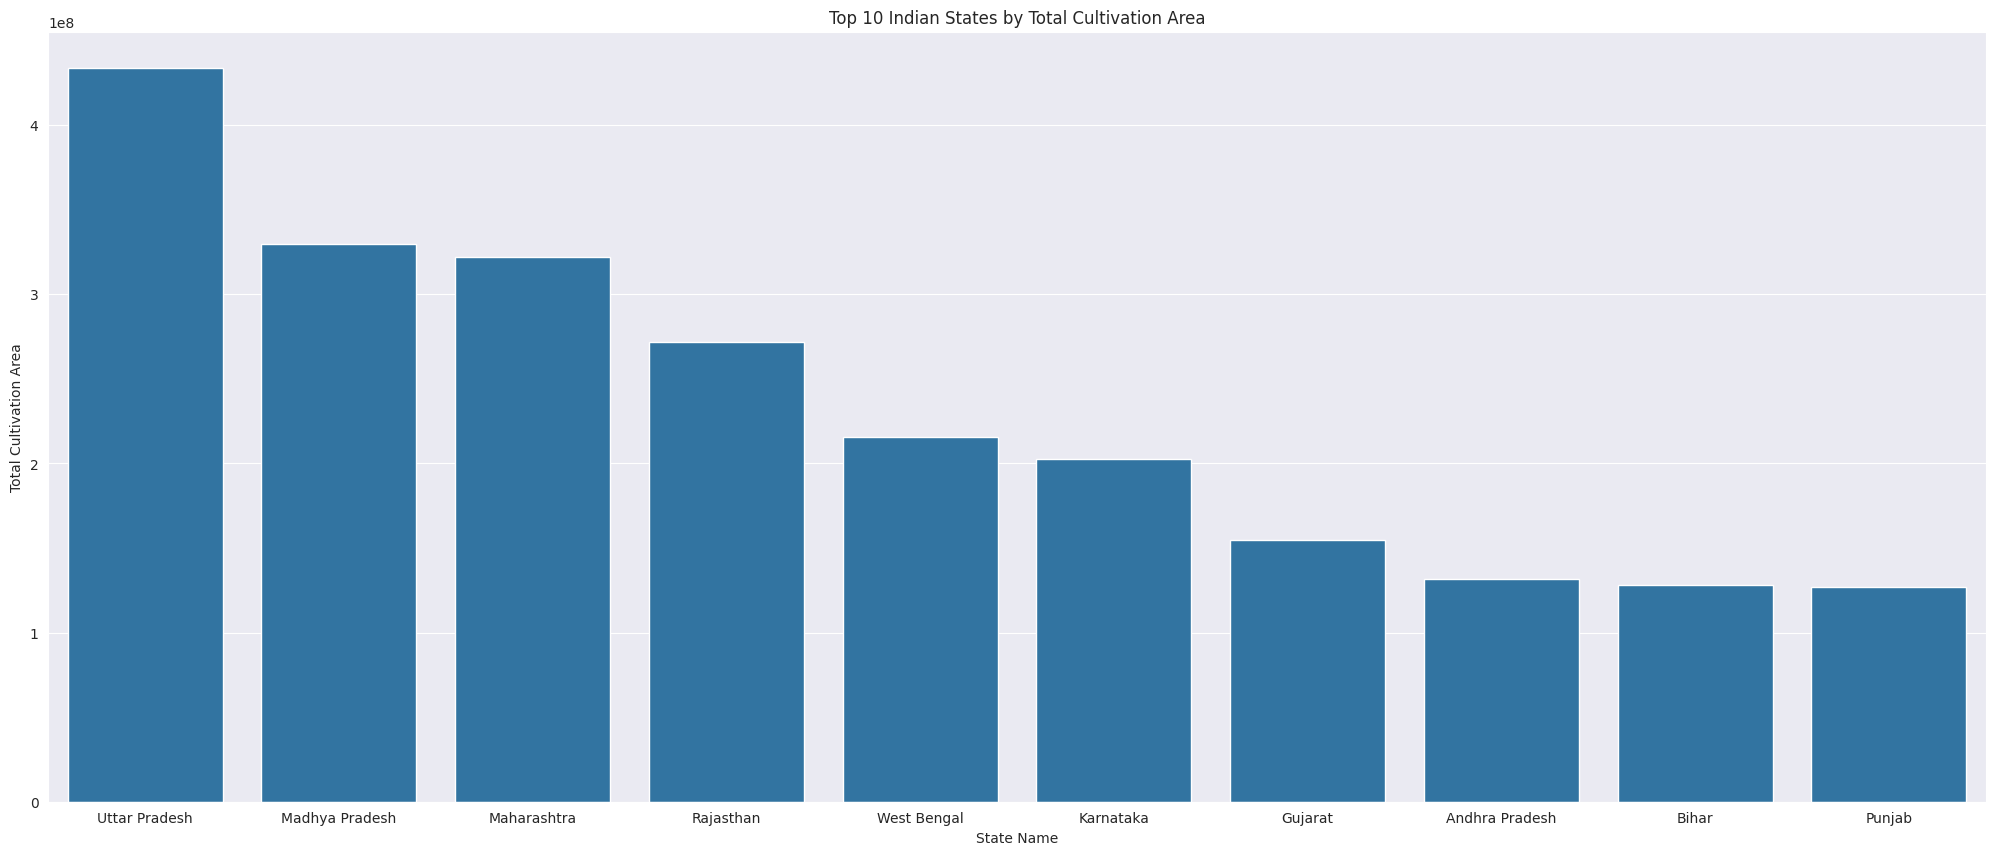

In [180]:
top_states_area = df_area.sort_values(by="Area", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(x=top_states_area['State_Name'], y=top_states_area['Area'], errwidth=0)
plt.title('Top 10 Indian States by Total Cultivation Area')
plt.xlabel('State Name')
plt.ylabel('Total Cultivation Area')
plt.show()

**Observation :**

*   Top crop producing states based on Area are Uttar Pradhesh followed by Madhya Pradhesh and Maharashtra


---





### **Crop categories and their Production rate**

<ipython-input-181-35e02b3345b6>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=final_df, x='cat_crop', y='Production', ci=None)


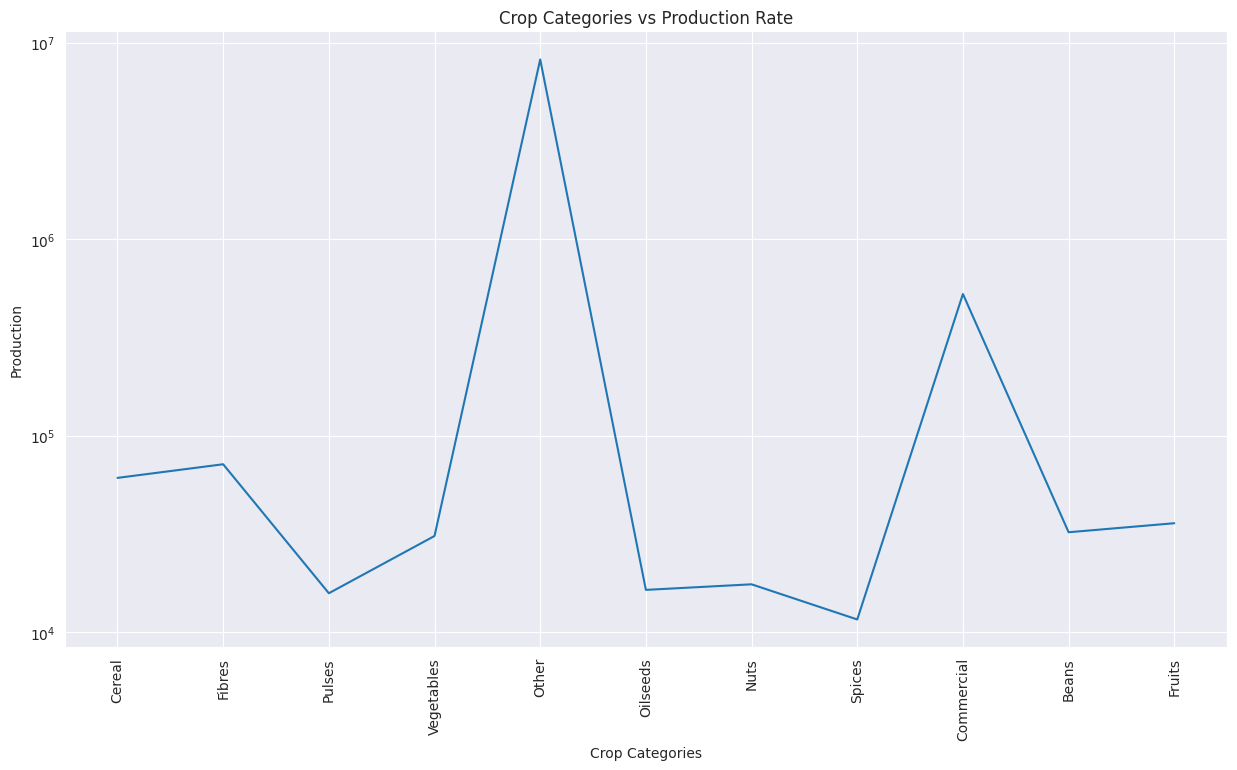

In [181]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.lineplot(data=final_df, x='cat_crop', y='Production', ci=None)
plt.title('Crop Categories vs Production Rate')
plt.xlabel('Crop Categories')
plt.ylabel('Production')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()
total_production_by_category = final_df.groupby(by='cat_crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)


In [182]:
print("Total Production by Crop Category:")
print(total_production_by_category)

Total Production by Crop Category:
      cat_crop    Production
7        Other  1.302003e+11
2   Commercial  5.637907e+09
1       Cereal  3.896141e+09
3       Fibres  7.302759e+08
10  Vegetables  7.226726e+08
8       Pulses  6.091078e+08
6     Oilseeds  5.668164e+08
0        Beans  3.022572e+08
9       Spices  2.557615e+08
4       Fruits  2.241779e+08
5         Nuts  2.034797e+08


**Observation :**

*   Commercial crops like Tobacco , Coffee , Tea , Rubber and Sugar cane has given the largest production


---



